<a href="https://colab.research.google.com/github/hvr2026/Apache-Beam-Data-Engineering/blob/main/Auto%20EDA/Netflix_AutoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Install necessary libraries
!pip install pandas matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Load the dataset into a Pandas DataFrame
data = pd.read_csv("/content/netflix_titles.csv")

# Display the first few rows of the dataset
print("Initial Dataset:")
print(data.head())


Initial Dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September

In [4]:

import pandas as pd
from google.colab import files
from IPython.display import display, HTML


# Load the dataset into a Pandas DataFrame
data = pd.read_csv("/content/netflix_titles.csv")


In [5]:

# Fill missing values in 'rating' with a placeholder
data['rating'].fillna('Unknown', inplace=True)

# Fill missing values in 'duration' with 0
data['duration'].fillna('0', inplace=True)

# Convert duration for Movies (in minutes) to numeric values
def extract_duration(row):
    if 'min' in row:
        return int(row.split()[0])
    elif 'Season' in row:
        return 0  # TV Shows
    else:
        return 0  # Placeholder for unknown

data['duration'] = data['duration'].apply(extract_duration)

# Drop irrelevant columns
data_cleaned = data.drop(columns=['show_id', 'title', 'description', 'director', 'cast', 'country', 'date_added'])

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['type', 'rating']
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

# Display the cleaned data
print("Data after cleaning and encoding:")
print(data_cleaned.head())


Data after cleaning and encoding:
   release_year  duration                                          listed_in  \
0          2020        90                                      Documentaries   
1          2021         0    International TV Shows, TV Dramas, TV Mysteries   
2          2021         0  Crime TV Shows, International TV Shows, TV Act...   
3          2021         0                             Docuseries, Reality TV   
4          2021         0  International TV Shows, Romantic TV Shows, TV ...   

   type_TV Show  rating_74 min  rating_84 min  rating_G  rating_NC-17  \
0         False          False          False     False         False   
1          True          False          False     False         False   
2          True          False          False     False         False   
3          True          False          False     False         False   
4          True          False          False     False         False   

   rating_NR  rating_PG  ...  rating_R  rating

<ipython-input-5-1fd9f95f003b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna('Unknown', inplace=True)
<ipython-input-5-1fd9f95f003b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

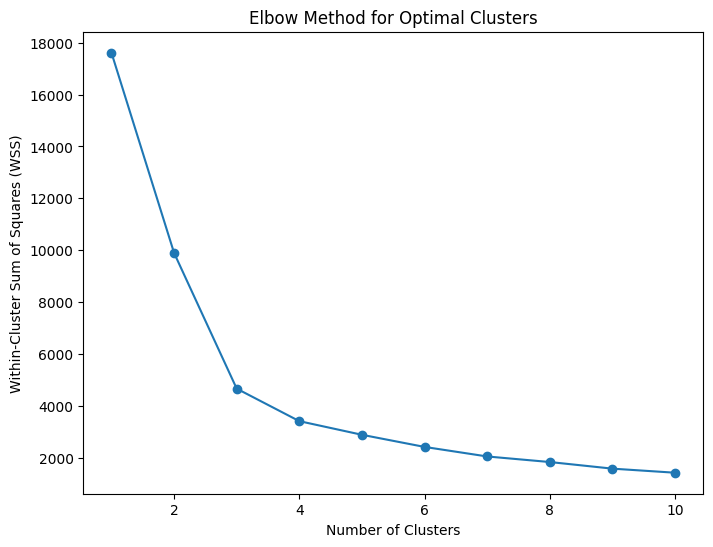

Data with clusters:
   release_year  duration  Cluster
0          2020        90        1
1          2021         0        0
2          2021         0        0
3          2021         0        0
4          2021         0        0


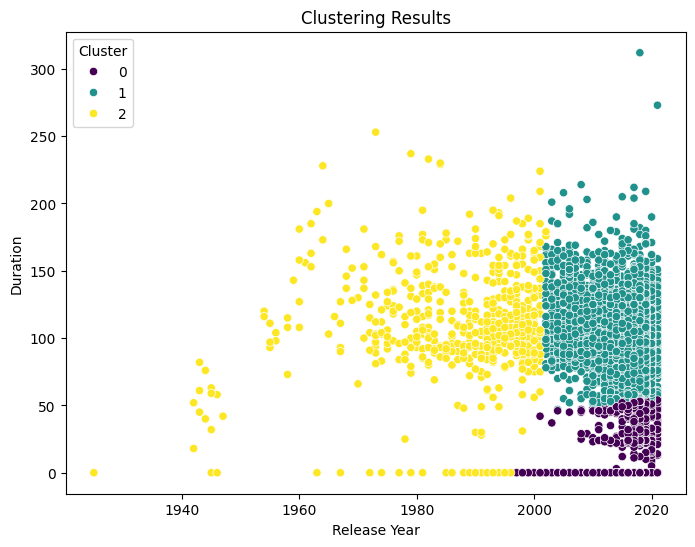

In [6]:

# Select features for clustering
features = ['release_year', 'duration']
X = data_cleaned[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WSS)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Perform KMeans clustering with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data_cleaned['Cluster'] = clusters

# Display data with clusters
print("Data with clusters:")
print(data_cleaned[['release_year', 'duration', 'Cluster']].head())

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['release_year'], y=data_cleaned['duration'], hue=data_cleaned['Cluster'], palette='viridis')
plt.title("Clustering Results")
plt.xlabel("Release Year")
plt.ylabel("Duration")
plt.show()


Data with PCA results:
       PCA1      PCA2  Cluster
0  0.182420  0.750862        1
1  1.497559 -0.403913        0
2  1.497559 -0.403913        0
3  1.497559 -0.403913        0
4  1.497559 -0.403913        0


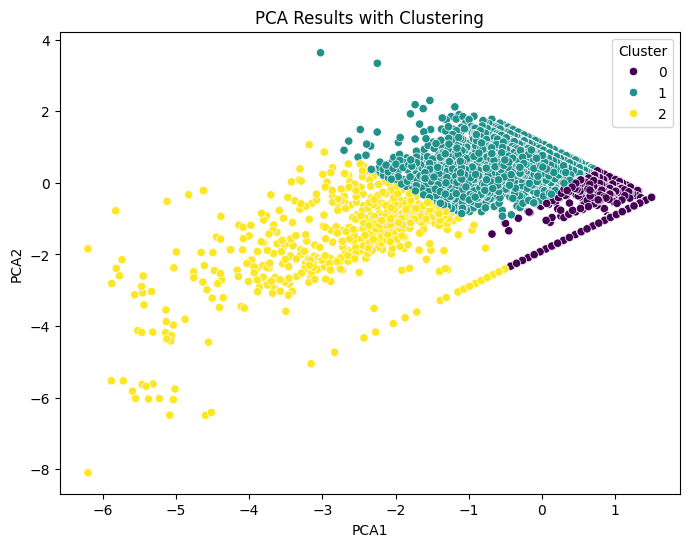


Explained variance by each component:
[0.6239796 0.3760204]


In [7]:

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
data_cleaned['PCA1'] = X_pca[:, 0]
data_cleaned['PCA2'] = X_pca[:, 1]

# Display data with PCA results
print("Data with PCA results:")
print(data_cleaned[['PCA1', 'PCA2', 'Cluster']].head())

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['PCA1'], y=data_cleaned['PCA2'], hue=data_cleaned['Cluster'], palette='viridis')
plt.title("PCA Results with Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# Print explained variance by PCA components
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance by each component:")
print(explained_variance)


In [10]:
from IPython.core.display import display, HTML
import json

# Convert the necessary data to JSON format
rating_data = data_cleaned[['PCA1', 'PCA2', 'Cluster']].to_dict(orient='records')
rating_json = json.dumps(rating_data)

# Generate an interactive D3.js scatterplot
html_code = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
</head>
<body>
    <h3>Interactive Scatter Plot (PCA Clustering)</h3>
    <svg width="800" height="500"></svg>
    <script>
        const data = {rating_json};

        const width = 800, height = 500, margin = 40;

        const svg = d3.select("svg");
        const xScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.PCA1))
            .range([margin, width - margin]);

        const yScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.PCA2))
            .range([height - margin, margin]);

        const colorScale = d3.scaleOrdinal(d3.schemeCategory10);

        svg.selectAll("circle")
            .data(data)
            .enter()
            .append("circle")
            .attr("cx", d => xScale(d.PCA1))
            .attr("cy", d => yScale(d.PCA2))
            .attr("r", 5)
            .attr("fill", d => colorScale(d.Cluster));

        svg.append("g")
            .attr("transform", "translate(0," + (height - margin) + ")")
            .call(d3.axisBottom(xScale));

        svg.append("g")
            .attr("transform", "translate(" + margin + ",0)")
            .call(d3.axisLeft(yScale));

        svg.append("text")
            .attr("x", width / 2)
            .attr("y", height - 10)
            .style("text-anchor", "middle")
            .text("PCA1");

        svg.append("text")
            .attr("transform", "rotate(-90)")
            .attr("x", -height / 2)
            .attr("y", 20)
            .style("text-anchor", "middle")
            .text("PCA2");
    </script>
</body>
</html>
"""

# Display the HTML in Colab
display(HTML(html_code))


In [13]:
from IPython.core.display import display, HTML
import json

# Convert the necessary data to JSON format
release_year_data = data_cleaned[['release_year', 'duration', 'Cluster']].to_dict(orient='records')
release_year_json = json.dumps(release_year_data)

# Generate an interactive D3.js scatterplot
html_code = f"""
<!DOCTYPE html>
<html>
<head>
    <script src="https://d3js.org/d3.v7.min.js"></script>
</head>
<body>
    <h3>Interactive Scatter Plot (Release Year vs Duration)</h3>
    <svg width="800" height="400"></svg>
    <script>
        const data = {release_year_json};

        const width = 800, height = 400;
        const margin = {{top: 20, right: 30, bottom: 40, left: 40}};
        const chartWidth = width - margin.left - margin.right;
        const chartHeight = height - margin.top - margin.bottom;

        const svg = d3.select("svg")
            .attr("width", width)
            .attr("height", height);

        const xScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.release_year))
            .range([margin.left, chartWidth + margin.left]);

        const yScale = d3.scaleLinear()
            .domain(d3.extent(data, d => d.duration))
            .range([chartHeight + margin.top, margin.top]);

        const colorScale = d3.scaleOrdinal(d3.schemeCategory10);

        // Add points to the scatterplot
        svg.selectAll("circle")
            .data(data)
            .enter()
            .append("circle")
            .attr("cx", d => xScale(d.release_year))
            .attr("cy", d => yScale(d.duration))
            .attr("r", 5)
            .attr("fill", d => colorScale(d.Cluster))
            .attr("stroke", "black");

        // Add X-axis
        svg.append("g")
            .attr("transform", "translate(0," + (chartHeight + margin.top) + ")")
            .call(d3.axisBottom(xScale));

        // Add Y-axis
        svg.append("g")
            .attr("transform", "translate(" + margin.left + ",0)")
            .call(d3.axisLeft(yScale));

        // Add axis labels
        svg.append("text")
            .attr("x", chartWidth / 2 + margin.left)
            .attr("y", height - 10)
            .style("text-anchor", "middle")
            .text("Release Year");

        svg.append("text")
            .attr("transform", "rotate(-90)")
            .attr("x", -chartHeight / 2 - margin.top)
            .attr("y", 10)
            .style("text-anchor", "middle")
            .text("Duration");
    </script>
</body>
</html>
"""

# Display the HTML in Colab
display(HTML(html_code))



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 97.9 MB/s eta 0:00:00
Data before AutoEDA:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating  duration  \
0  September 25, 2021          2020  PG-13  

                                             |          | [  0%]   00:00 -> (? left)

Report Netflix_AutoEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



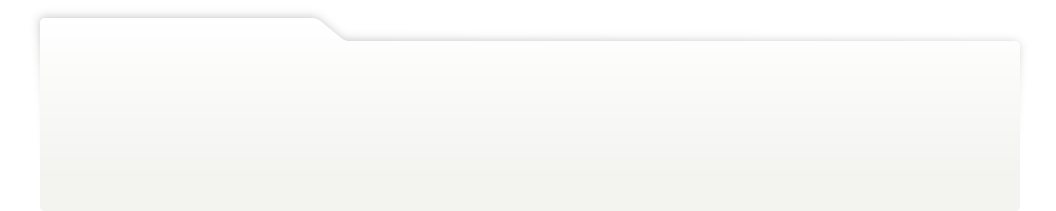
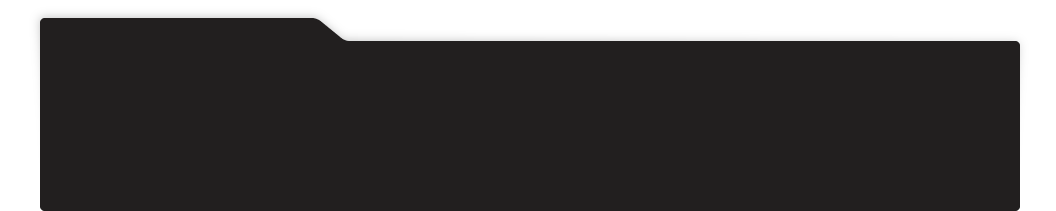
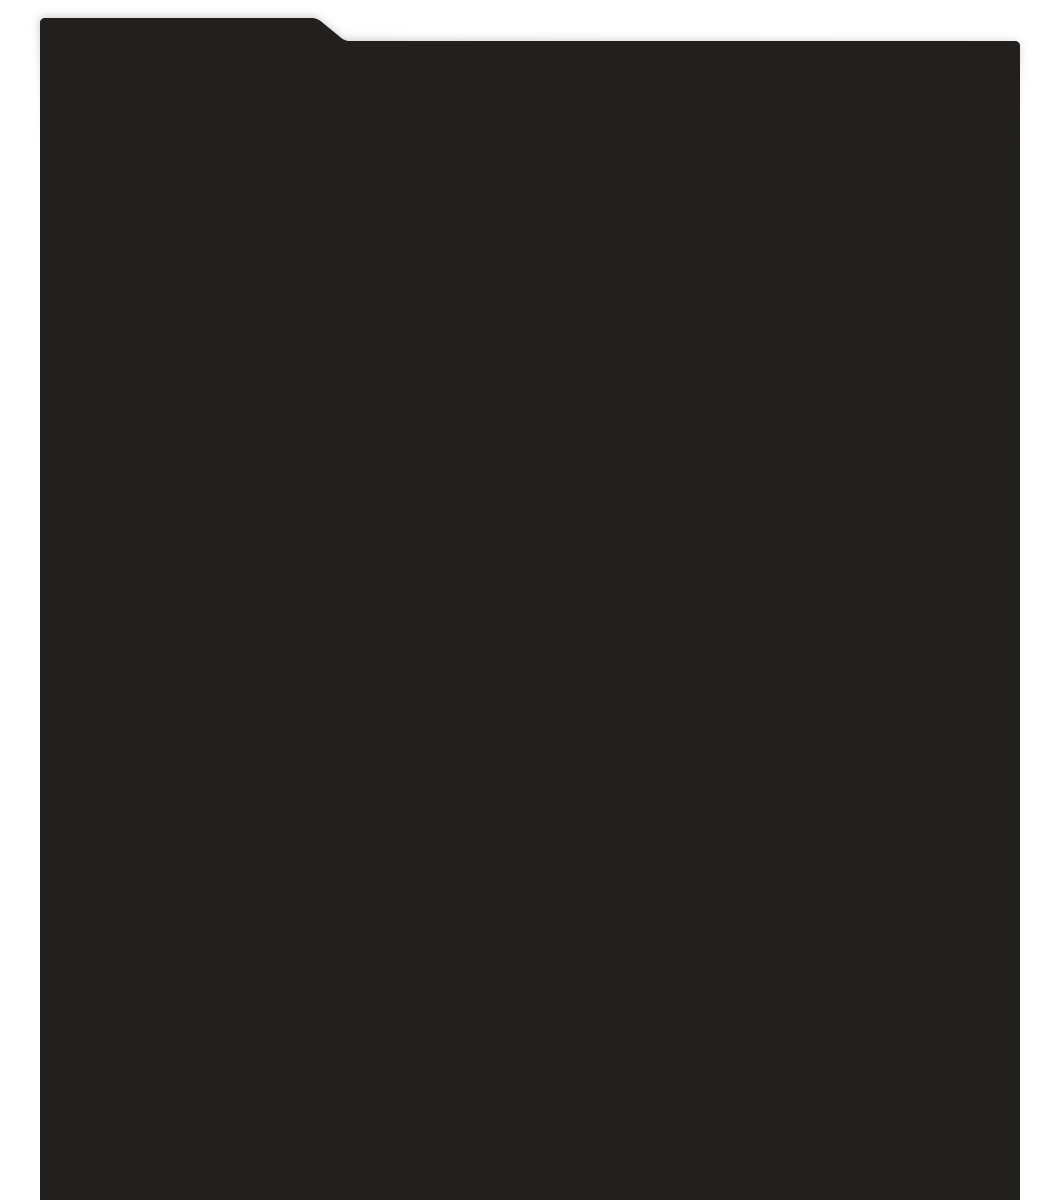
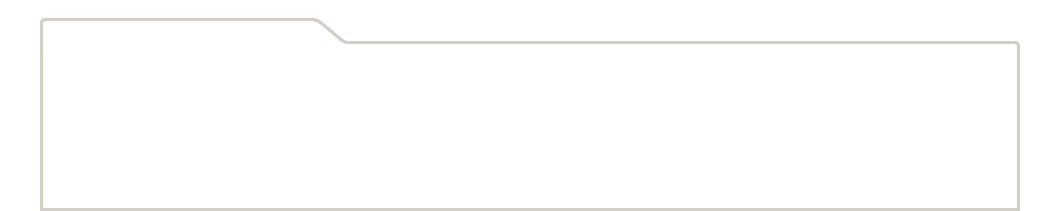
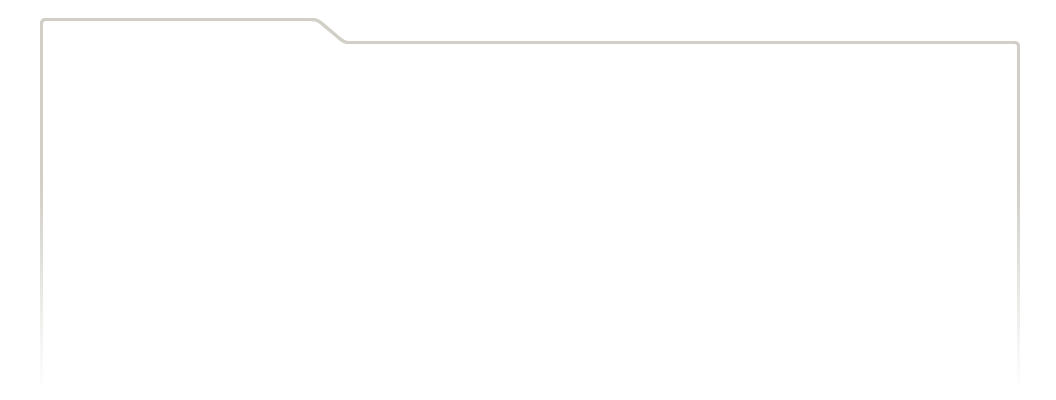
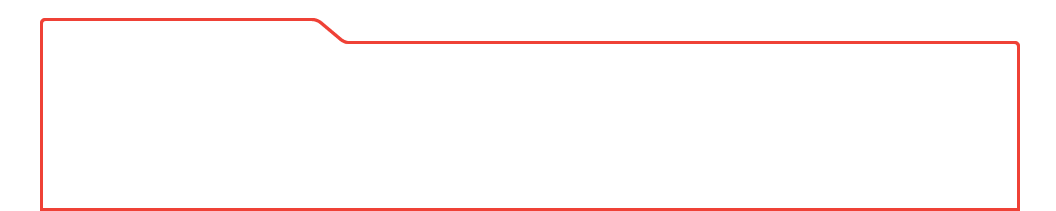
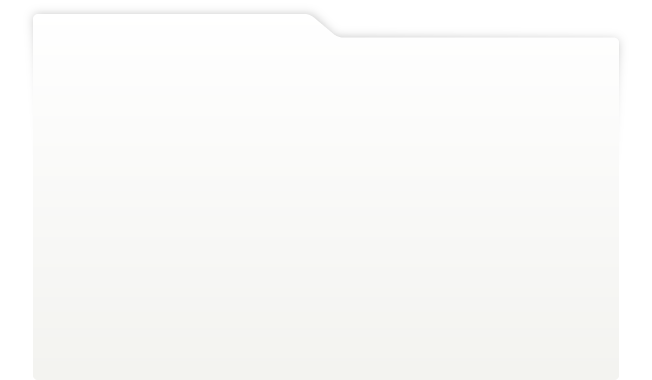
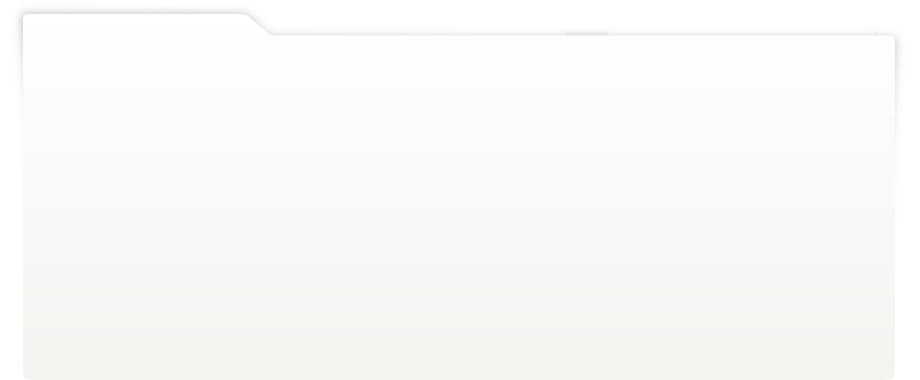
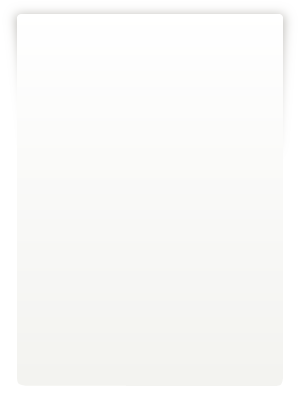
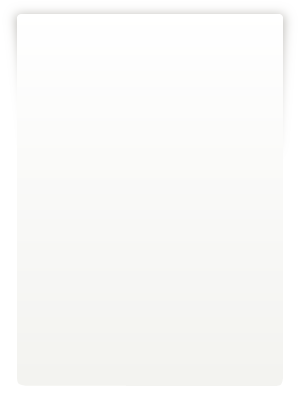
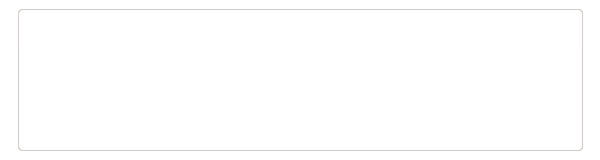
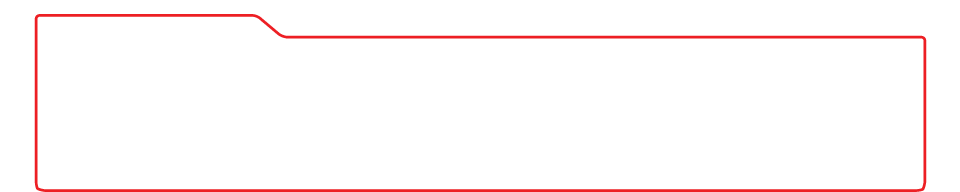
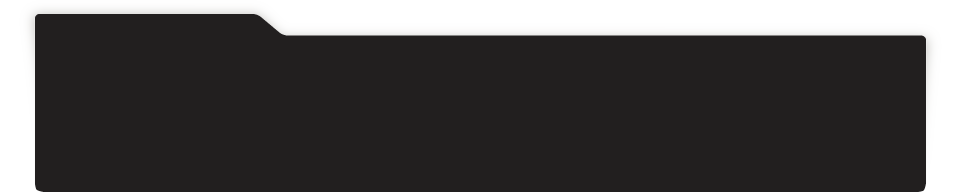
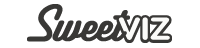
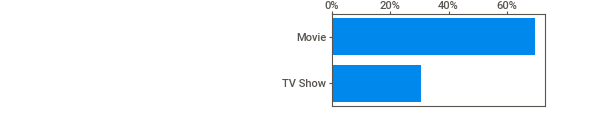
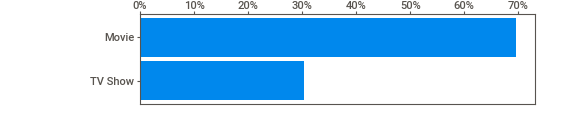
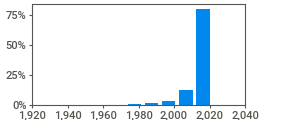
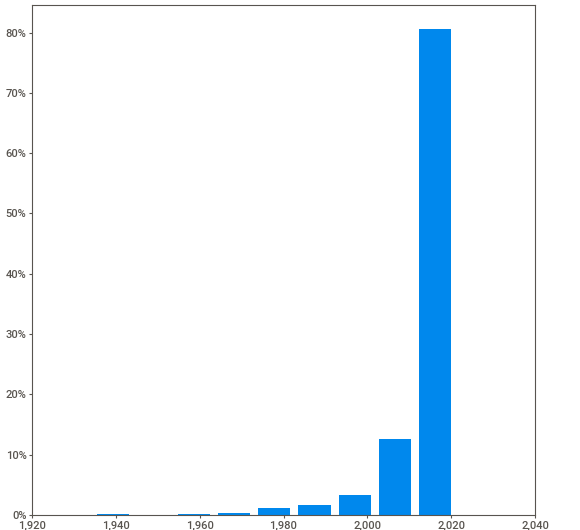
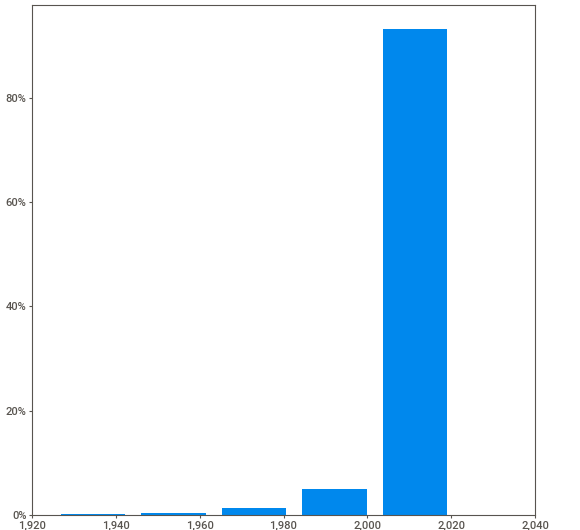
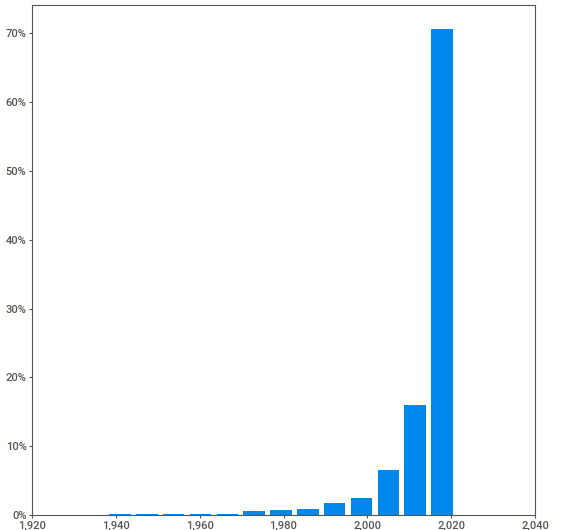
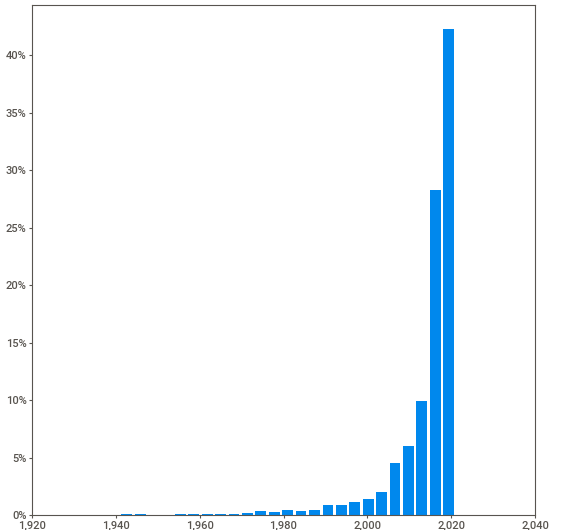
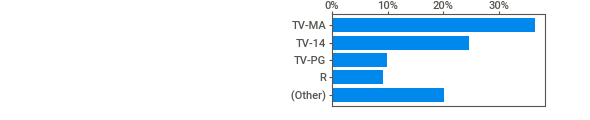
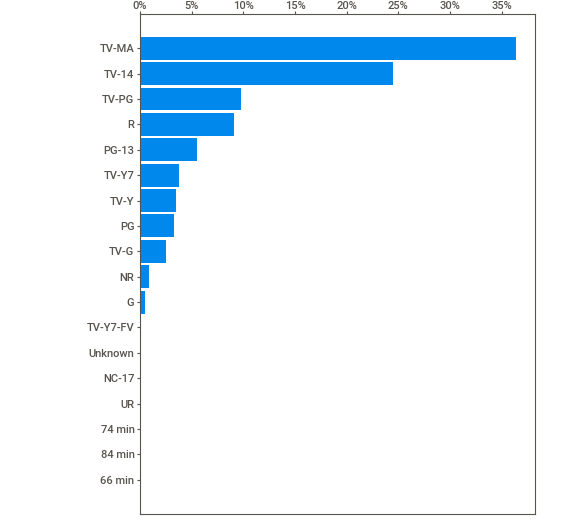
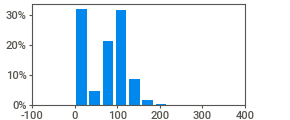
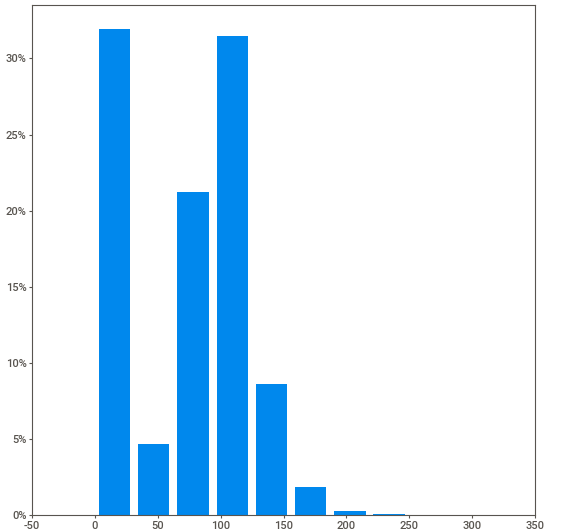
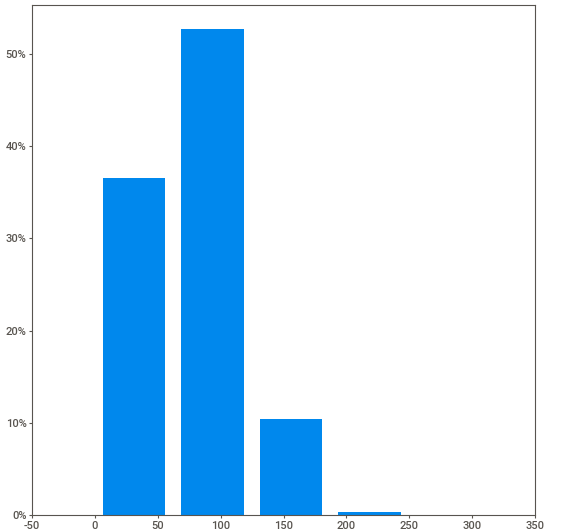
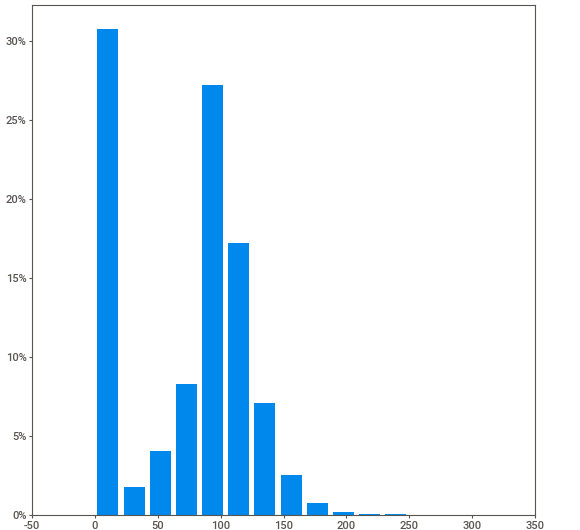
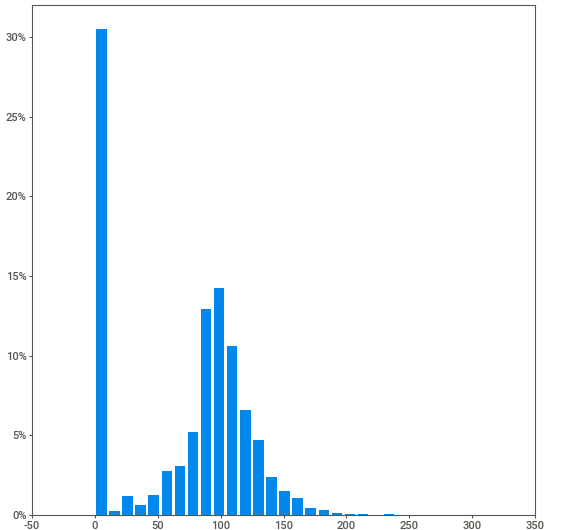
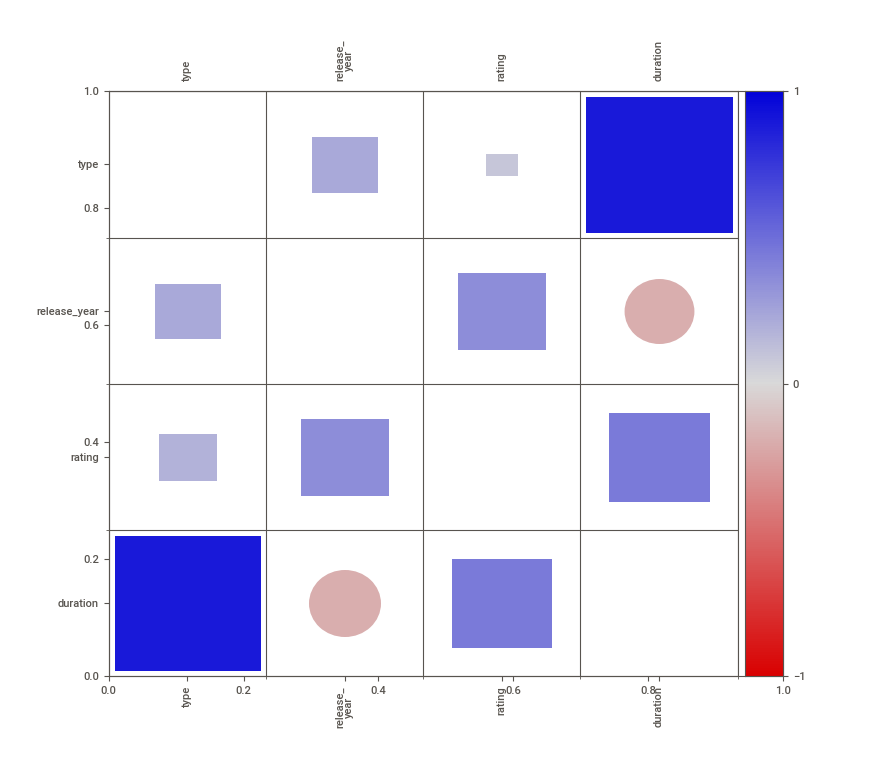
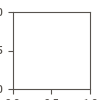

In [14]:

# Install Sweetviz
!pip install sweetviz

# Perform AutoEDA using Sweetviz
import sweetviz as sv

# Display the first few rows of the data before AutoEDA
print("Data before AutoEDA:")
print(data.head())

# Generate a Sweetviz report
report = sv.analyze(data)
report.show_html('Netflix_AutoEDA.html')  # Saves the report to an HTML file

# Display the report in Colab
from IPython.core.display import display, HTML
display(HTML('Netflix_AutoEDA.html'))
